# IML2 - Algoritmo K-Means #

In [1]:
#importar numpy para trabalhar com matrizes e pandas para ler dados no formato frame
import numpy as np
import pandas as pd

#importar o pacote datasets do scikit-learn para carregar conjuntos de dados
from sklearn import datasets

#importar KMeans para fazer o agrupamento
from sklearn.cluster import KMeans

#importar o módulo pyplot para plotar o gráfico no método do cotovelo
import matplotlib.pyplot as plt


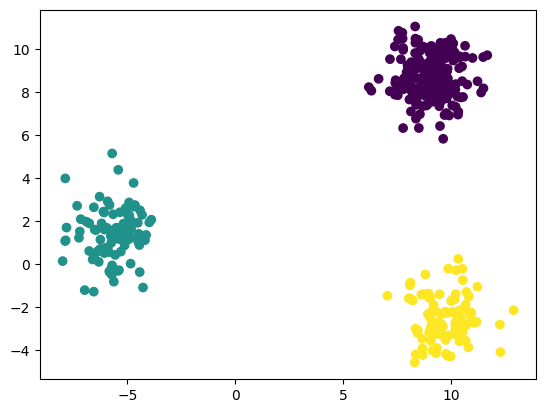

In [2]:
#gerando dados 2D e plotando com tamanhos diferentes de marcadores

X, y = datasets.make_blobs(n_samples=[200,100,100])
plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(X)
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 9.77504695, -2.53194969],
       [-5.64846592,  1.40008927],
       [ 9.03358099,  8.74402221]])

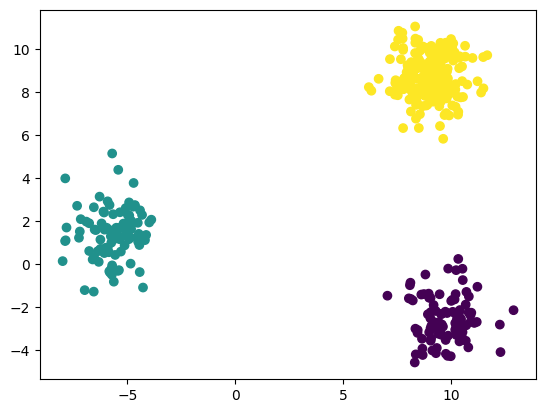

In [4]:
y_pred = kmeans.labels_
plt.scatter(X[:,0], X[:,1], c=y_pred)

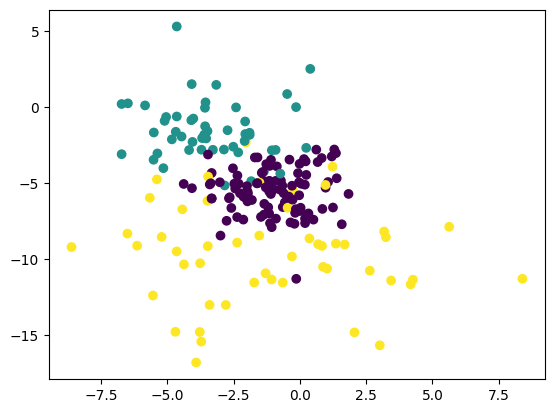

In [5]:
#gerando dados 2D e plotando com tamanhos diferentes de marcadores

X1, y1 = datasets.make_blobs(n_samples=[100,50,50],cluster_std=[1.5,2.0,3.0])
plt.scatter(X1[:,0], X1[:,1], c=y1)

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(X1)
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ -3.70127786,  -1.31421713],
       [ -1.25488626,  -5.56342571],
       [ -0.13450219, -11.21793582]])

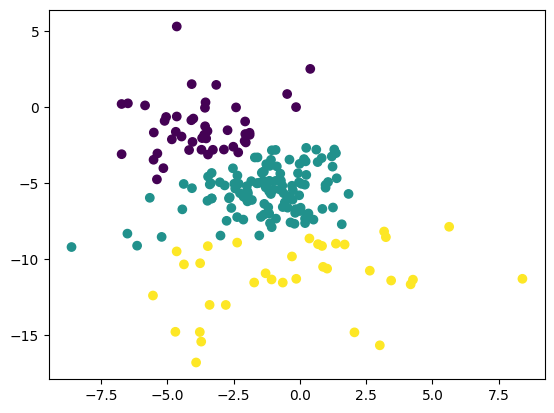

In [7]:
y_pred1 = kmeans.labels_
plt.scatter(X1[:,0], X1[:,1], c=y_pred1)

In [8]:
#importar a classe MinMaxScaler para fazer pré-processamento
from sklearn.preprocessing import MinMaxScaler

In [9]:
#Ler o conjunto de dados Wholesale_customers_data.csv do diretório local
# Quando aparecer o campo <Selecionar arquivo>, selecionar o arquivo do diretório local
# https://archive.ics.uci.edu/dataset/292/wholesale+customers
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [10]:
import io
# df.head() mostra as 5 primeiras linhas do arquivo
df = pd.read_csv(io.StringIO(uploaded['Wholesale customers data.csv'].decode('utf-8')))
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
#Definir a lista de atributos categóricos e atributos contínuos

categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

#Transformar atributos categóricos em binários com a função get_dummies()
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [12]:
#normalizar os atributos contínuos com MinMaxScaler()
mms = MinMaxScaler()


mms.fit(df)
df_transformed = mms.transform(df)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,1.0,0.0,0.0,1.0
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,1.0,0.0,0.0,1.0
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,1.0,0.0,0.0,1.0
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1.0,0.0,0.0,0.0,1.0
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,1.0,0.0,0.0,1.0



## Determinação do melhor número de grupos usando a soma quadrática das distâncias como índice interno (Método do “cotovelo”)

### Agrupar variando o número de grupos


Aplicar o algoritmo k-means no conjunto de dados (sem a classe) para todos os valores do intervalo definido e armazenar o valor do índice soma quadrática das distâncias para todos os agrupamentos encontrados usando o atributo inertia_ do algoritmo Kmeans do Python;



In [13]:
K = range(1,15)

In [14]:
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plotar o gráfico dos índices encontrados para cada número de grupos e determinar qual é o melhor de acordo com o método do cotovelo explicado na aula.
De acordo com o método, os melhores números de grupos seriam 3 ou 4

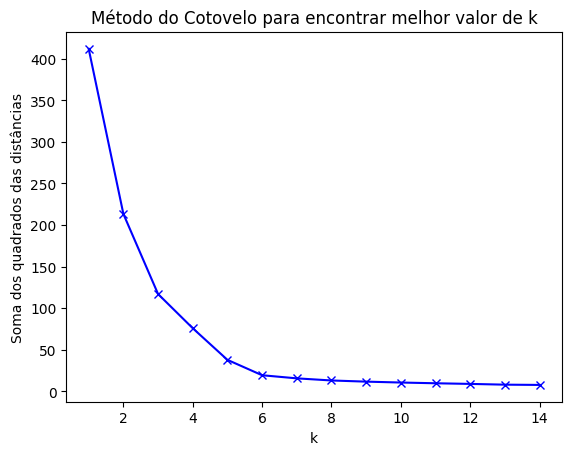

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

In [16]:
%pip install -U -q dtreeviz seaborn yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

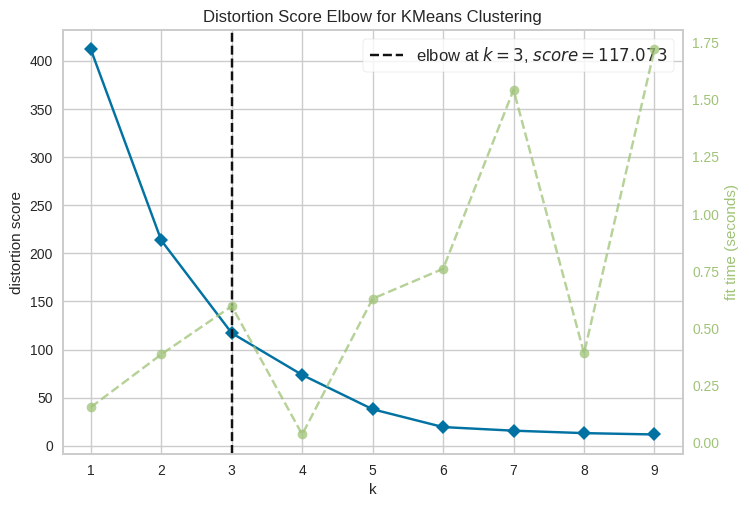

In [17]:
from yellowbrick.cluster import KElbowVisualizer
#km_transformed = mms.transform(km)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_transformed)
visualizer.show();